In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
from tqdm import tqdm

# UMDA

In [9]:
class UMDA:
    def __init__(self, cost_f, d, N, M, iters=1000):
        self.cost_f = cost_f
        self.d = d
        self.N = N
        self.M = M
        self.iters = iters
        self.scores = []
        self.ps = []

        self.p = np.ones(self.d) / 2
        self.P = np.random.rand(self.N, self.d) < self.p
        self.cost = self.cost_f(self.P)
        self.best_score = 0

    def run(self):
        for _ in tqdm(range(self.iters), desc='UMDA', position=0):
            M_best = self.P[np.argsort(self.cost)][-self.M:]
            self.p = M_best.sum(axis=0) / self.M

            self.P = np.random.rand(self.N, self.d) < self.p
            self.cost = self.cost_f(self.P)

            self.ps.append(np.array(self.p))
            self.scores.append(
                [self.cost.max(), self.cost.mean(), self.cost.min()])
            self.best_score = max(self.best_score, self.cost.max())

    def plot_res(self, title=''):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(title + f' | BEST: {self.best_score}')

        ax[0].plot(np.arange(self.iters), np.array(self.scores)
                   [:, 0], color='green', label='Best')
        ax[0].plot(np.arange(self.iters), np.array(self.scores)[
                   :, 1], color='blue', label='Average')
        ax[0].plot(np.arange(self.iters), np.array(self.scores)
                   [:, 2], color='red', label='Worst')
        ax[0].legend(loc='lower right')
        ax[0].set_title('Objective function')

        ax[1].plot(np.arange(self.iters), np.array(self.ps))
        ax[1].set_title('Probabilities')

        plt.show()


# PBIL

In [10]:
class PBIL:
    def __init__(self, cost_f, d, N, T1, T2, T3, iters=1000):
        self.cost_f = cost_f
        self.d = d
        self.N = N
        self.Theta1 = T1
        self.Theta2 = T2
        self.Theta3 = T3
        self.iters = iters
        self.scores = []
        self.ps = []

        self.p = np.ones(self.d) / 2
        self.P = np.random.rand(self.N, self.d) < self.p
        self.cost = self.cost_f(self.P)
        self.best_score = 0

    def run(self):
        for i in tqdm(range(self.iters), desc='PBIL', position=0):
            best = self.P[np.argmax(self.cost)]
            self.p = self.p * (1 - self.Theta1) + best * self.Theta1

            self.p = np.array([self.p[i] * (1 - self.Theta3) + (np.random.rand() < 0.5) * self.Theta3
                               if np.random.rand() < self.Theta2
                               else self.p[i]
                               for i in range(self.d)])

            self.P = np.random.rand(self.N, self.d) < self.p
            self.cost = self.cost_f(self.P)

            self.ps.append(self.p)
            self.scores.append(
                [self.cost.max(), self.cost.mean(), self.cost.min()])
            self.best_score = max(self.best_score, self.cost.max())

    def plot_res(self, title=''):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(title + f' | BEST: {self.best_score}')

        n = len(self.scores)
        ax[0].plot(np.arange(n), np.array(self.scores)
                   [:, 0], color='green', label='Best')
        ax[0].plot(np.arange(n), np.array(self.scores)[
                   :, 1], color='blue', label='Average')
        ax[0].plot(np.arange(n), np.array(self.scores)
                   [:, 2], color='red', label='Worst')
        ax[0].legend(loc='lower right')
        ax[0].set_title('Objective function')

        ax[1].plot(np.arange(n), np.array(self.ps))
        ax[1].set_title('Probabilities')

        plt.show()


# CGA

In [11]:
class CGA:
    def __init__(self, cost_f, d, N, Theta, iters=1000):
        self.cost_f = cost_f
        self.d = d
        self.N = N
        self.Theta = Theta
        self.iters = iters
        self.scores = []
        self.ps = []

        self.p = np.ones(self.d) / 2
        self.P = np.random.rand(self.N, self.d) < self.p
        self.cost = self.cost_f(self.P)
        self.best_score = 0

    def run(self):
        for i in tqdm(range(self.iters), desc='CGA', position=0):
            best = self.P[np.argmax(self.cost)]
            worst = self.P[np.argmin(self.cost)]

            for i in range(len(self.p)):
                if best[i] == 1 and worst[i] == 0:
                    self.p[i] += self.Theta
                if best[i] == 0 and worst[i] == 1:
                    self.p[i] -= self.Theta

            self.P = np.random.rand(self.N, self.d) < self.p
            self.cost = self.cost_f(self.P)

            self.ps.append(np.array(self.p))
            self.scores.append(
                [self.cost.max(), self.cost.mean(), self.cost.min()])
            self.best_score = max(self.best_score, self.cost.max())

    def plot_res(self, title=''):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(title + f' | BEST: {self.best_score}')

        n = len(self.scores)
        ax[0].plot(np.arange(n), np.array(self.scores)
                   [:, 0], color='green', label='Best')
        ax[0].plot(np.arange(n), np.array(self.scores)[
                   :, 1], color='blue', label='Average')
        ax[0].plot(np.arange(n), np.array(self.scores)
                   [:, 2], color='red', label='Worst')
        ax[0].legend(loc='lower right')
        ax[0].set_title('Objective function')

        ax[1].plot(np.arange(n), np.array(self.ps))
        ax[1].set_title('Probabilities')

        plt.show()

# Objective functions

In [12]:
def OneMax(P):
    return P.sum(axis=1)


def DeceptiveOneMax(P):
    N, d = P.shape
    s = P.sum(axis=1)
    s[s == 0] = d + 1
    return s


def K_DeceptiveOneMax(P, k=5):
    N, d = P.shape
    s = np.zeros(N)

    for j in range(k, d + 1, k):
        tmp = P[:, j - k: j].sum(axis=1)
        tmp[tmp == 0] = k + 1
        s += tmp

    return s

UMDA:  40%|████      | 121/300 [00:00<00:00, 1208.93it/s]


d = 50


Objective function: OneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 1526.24it/s]


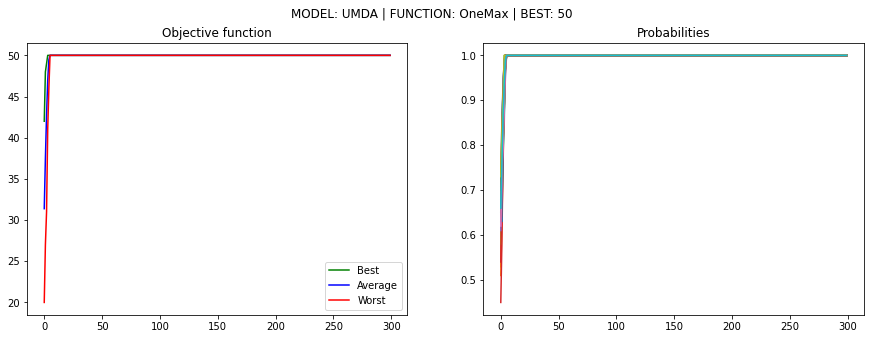

PBIL: 100%|██████████| 300/300 [00:00<00:00, 1878.36it/s]


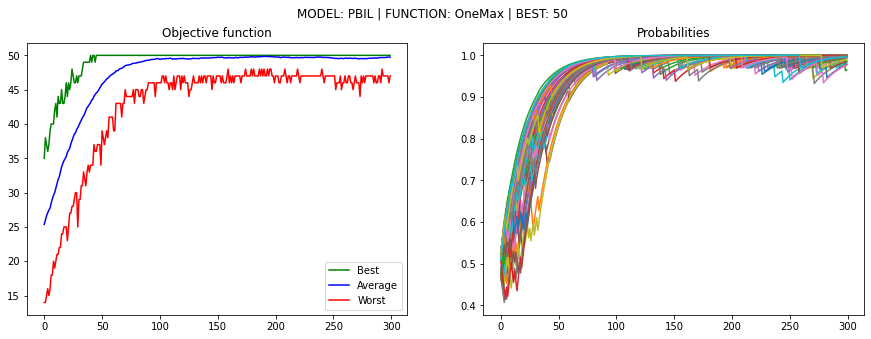

CGA: 100%|██████████| 300/300 [00:00<00:00, 1593.66it/s]


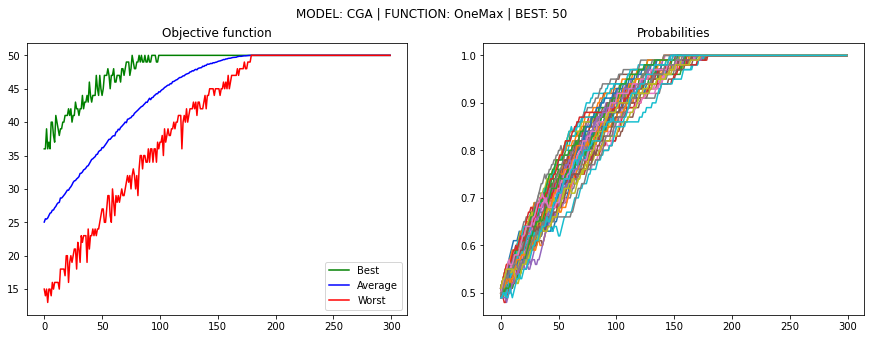

UMDA: 100%|██████████| 300/300 [00:00<00:00, 1665.12it/s]


Objective function: DeceptiveOneMax



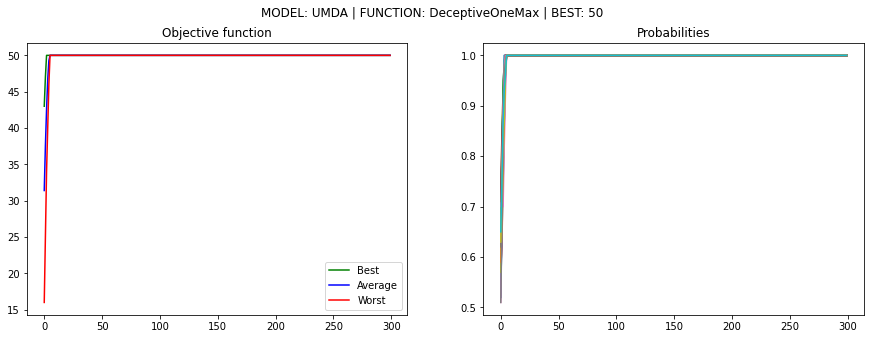

PBIL: 100%|██████████| 300/300 [00:00<00:00, 1785.68it/s]


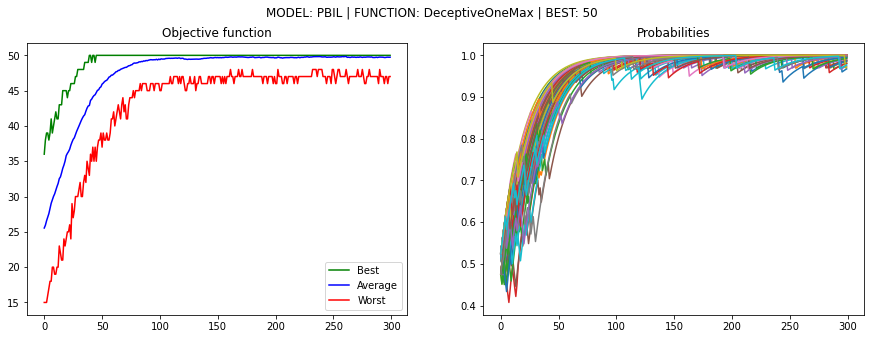

CGA: 100%|██████████| 300/300 [00:00<00:00, 1517.77it/s]


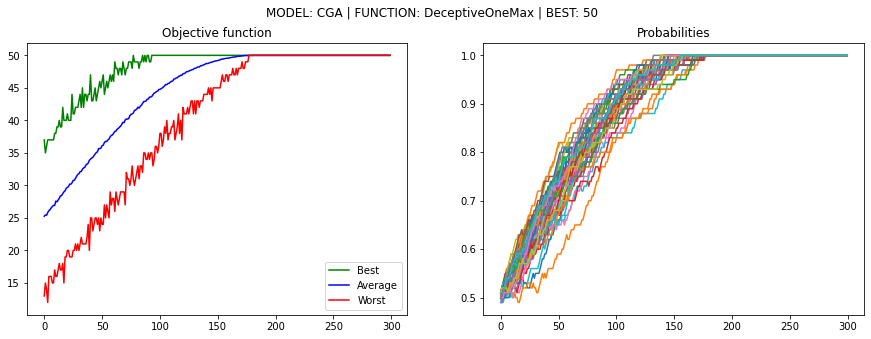

UMDA:  33%|███▎      | 100/300 [00:00<00:00, 992.00it/s]


Objective function: K_DeceptiveOneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 1227.55it/s]


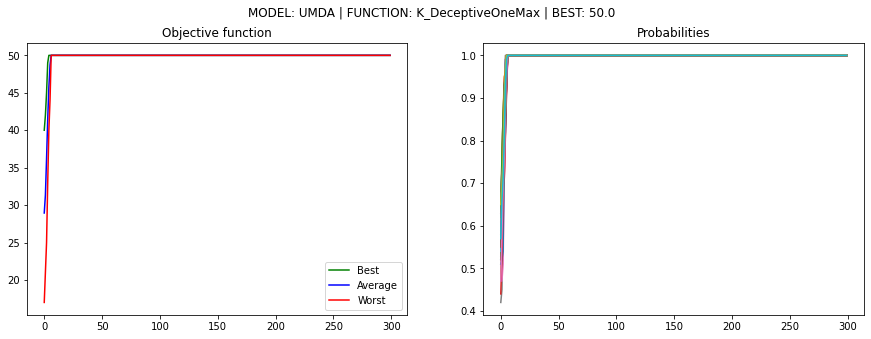

PBIL: 100%|██████████| 300/300 [00:00<00:00, 1267.46it/s]


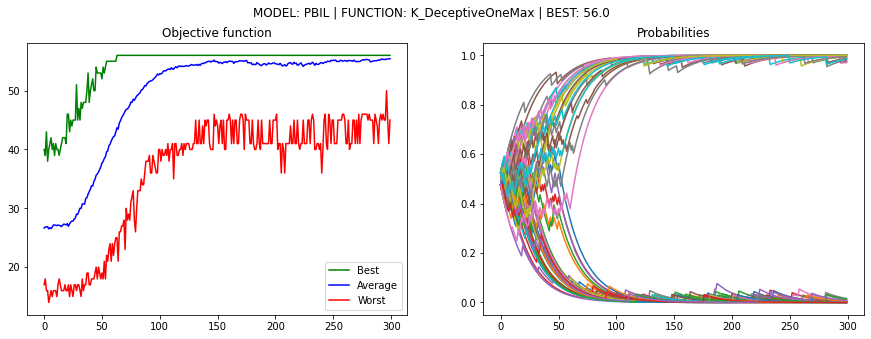

CGA: 100%|██████████| 300/300 [00:00<00:00, 1096.43it/s]


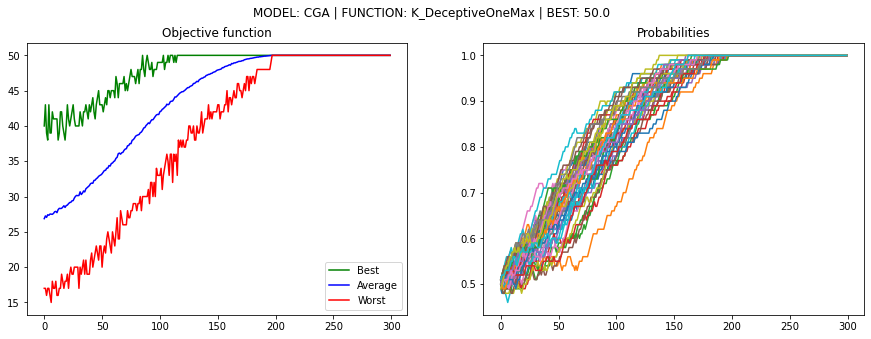

UMDA:  29%|██▊       | 86/300 [00:00<00:00, 855.49it/s]


d = 100


Objective function: OneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 934.35it/s]


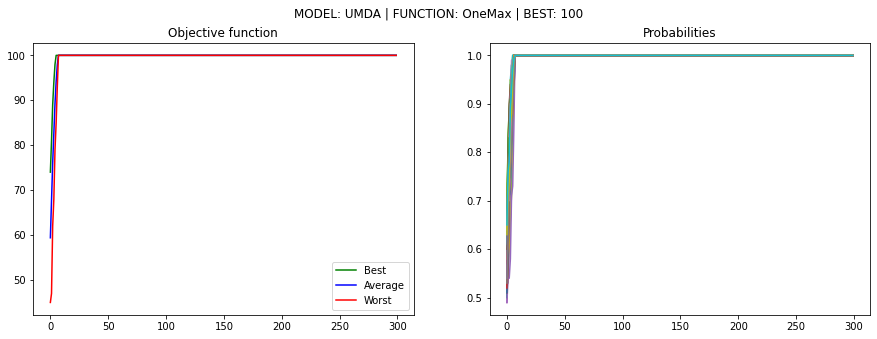

PBIL: 100%|██████████| 300/300 [00:00<00:00, 1071.68it/s]


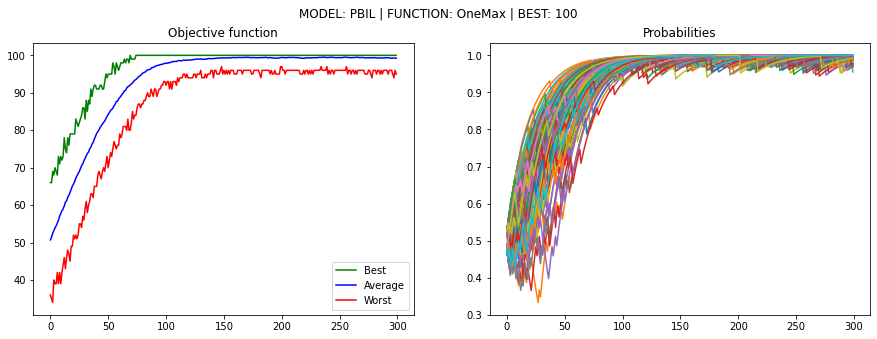

CGA: 100%|██████████| 300/300 [00:00<00:00, 778.96it/s]


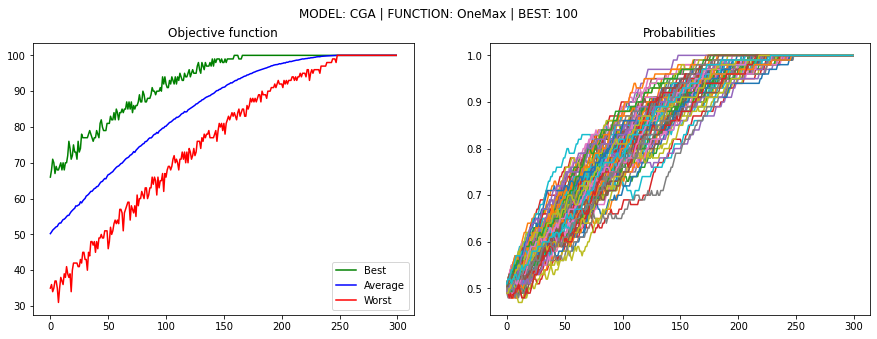

UMDA:  32%|███▏      | 96/300 [00:00<00:00, 956.08it/s]


Objective function: DeceptiveOneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 994.73it/s] 


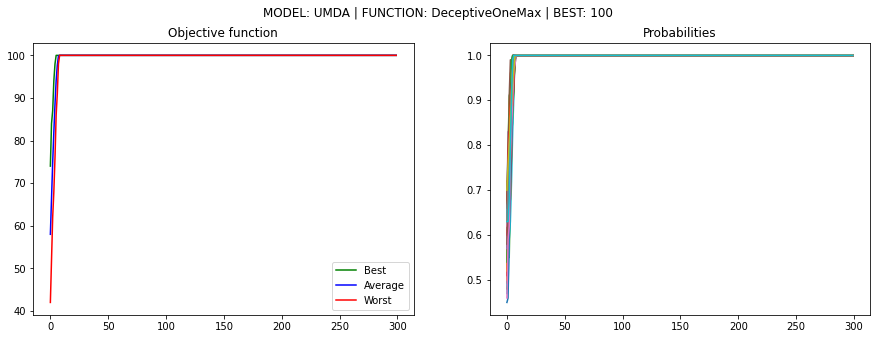

PBIL: 100%|██████████| 300/300 [00:00<00:00, 1068.80it/s]


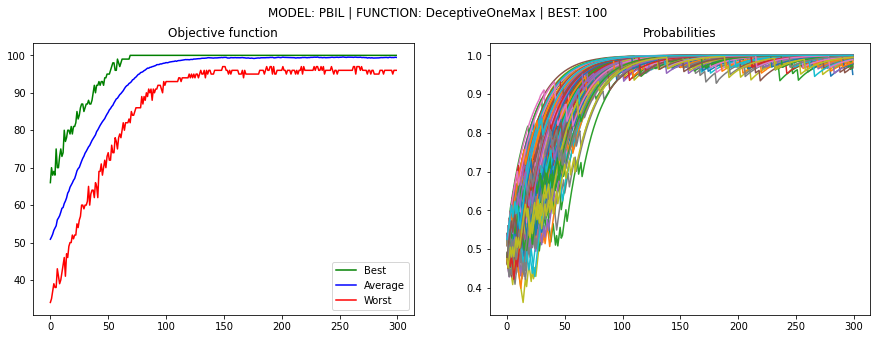

CGA: 100%|██████████| 300/300 [00:00<00:00, 640.74it/s]


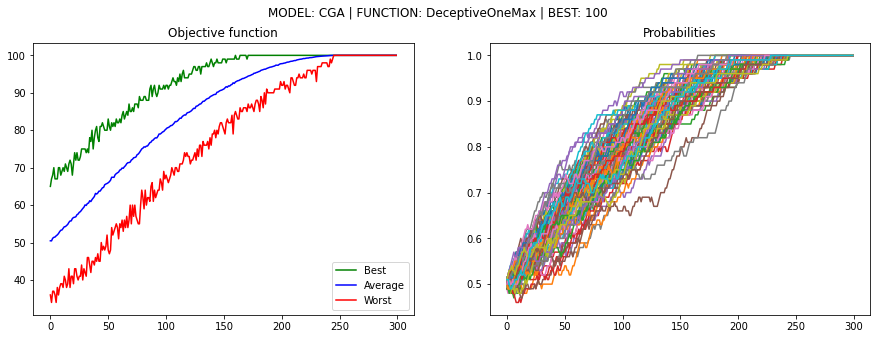

UMDA:  23%|██▎       | 68/300 [00:00<00:00, 674.04it/s]


Objective function: K_DeceptiveOneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 698.11it/s]


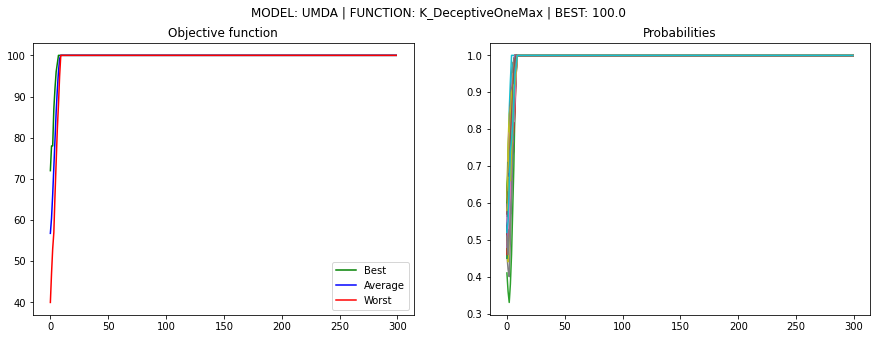

PBIL: 100%|██████████| 300/300 [00:00<00:00, 666.37it/s]


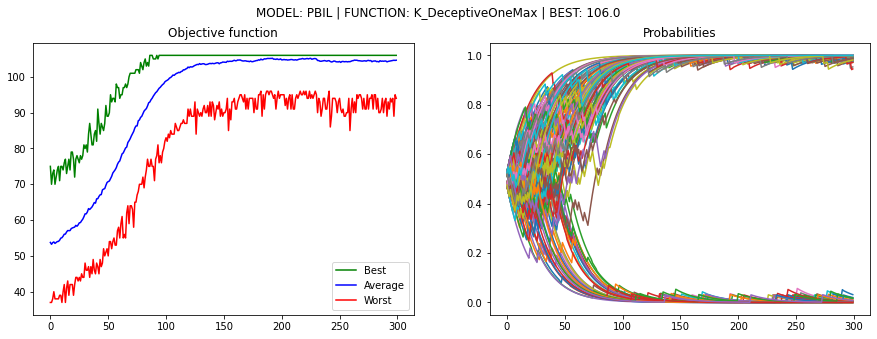

CGA: 100%|██████████| 300/300 [00:00<00:00, 607.16it/s]


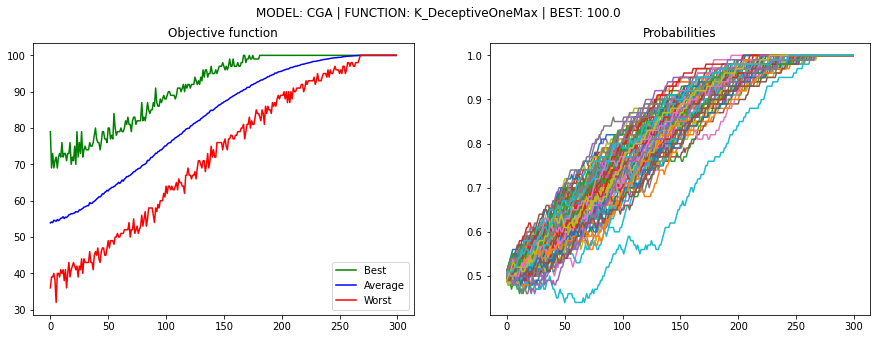

UMDA:  19%|█▉        | 57/300 [00:00<00:00, 563.58it/s]


d = 200


Objective function: OneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 587.00it/s]


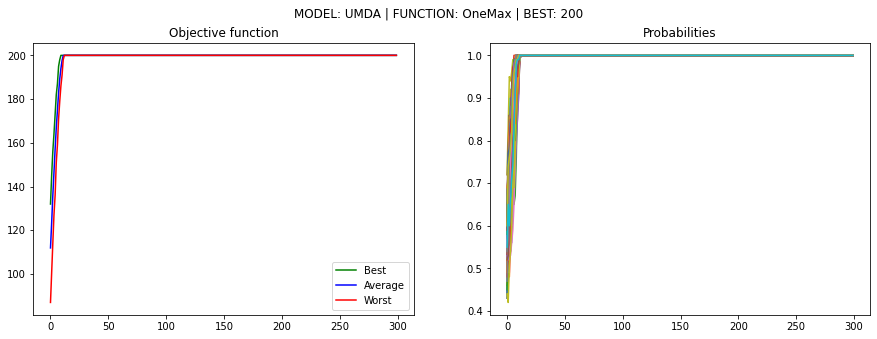

PBIL: 100%|██████████| 300/300 [00:00<00:00, 540.83it/s]


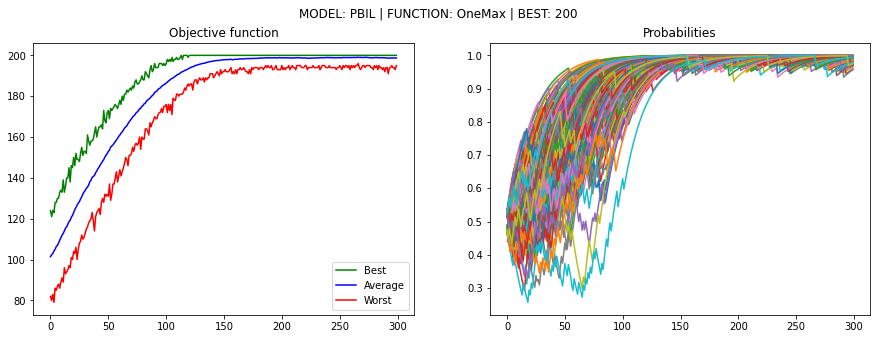

CGA: 100%|██████████| 300/300 [00:00<00:00, 424.32it/s]


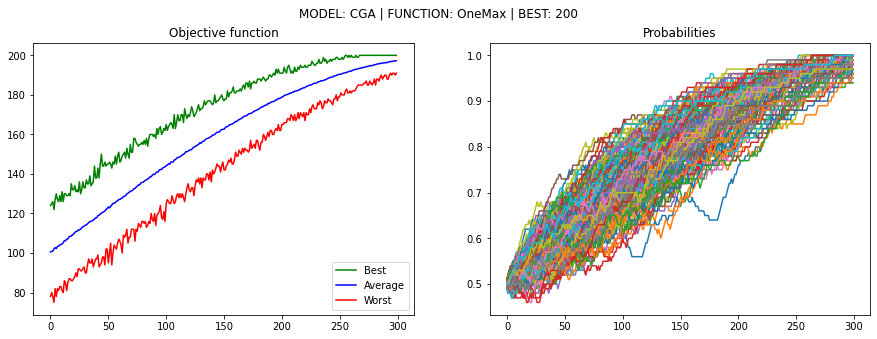

UMDA:  16%|█▋        | 49/300 [00:00<00:00, 484.63it/s]


Objective function: DeceptiveOneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 500.87it/s]


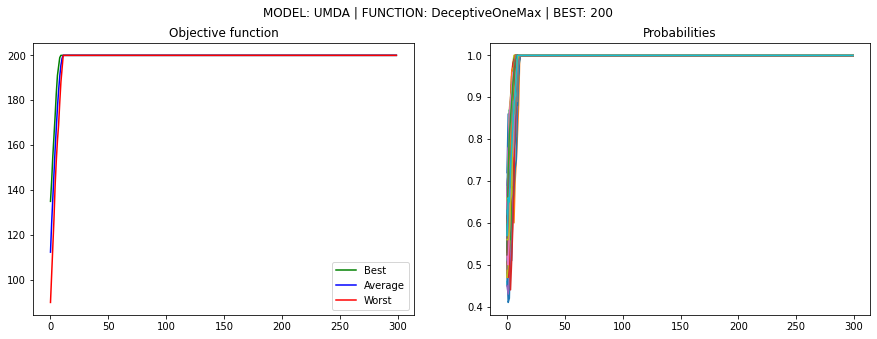

PBIL: 100%|██████████| 300/300 [00:00<00:00, 514.60it/s]


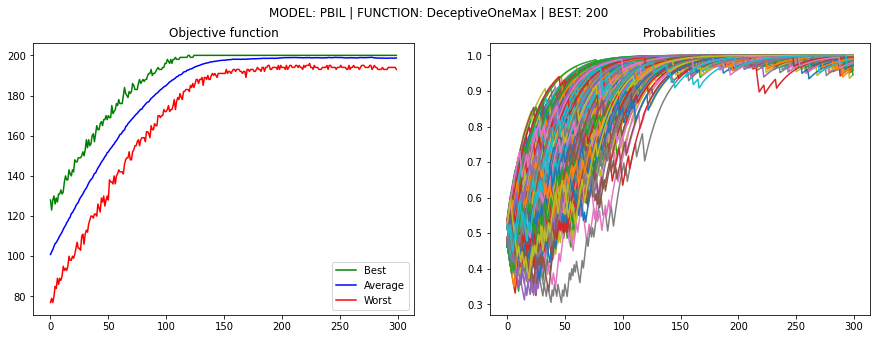

CGA: 100%|██████████| 300/300 [00:00<00:00, 429.58it/s]


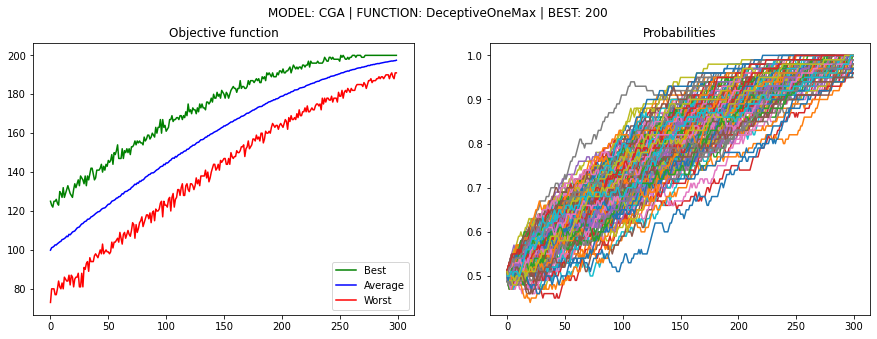

UMDA:  11%|█         | 33/300 [00:00<00:00, 328.54it/s]


Objective function: K_DeceptiveOneMax



UMDA: 100%|██████████| 300/300 [00:00<00:00, 353.21it/s]


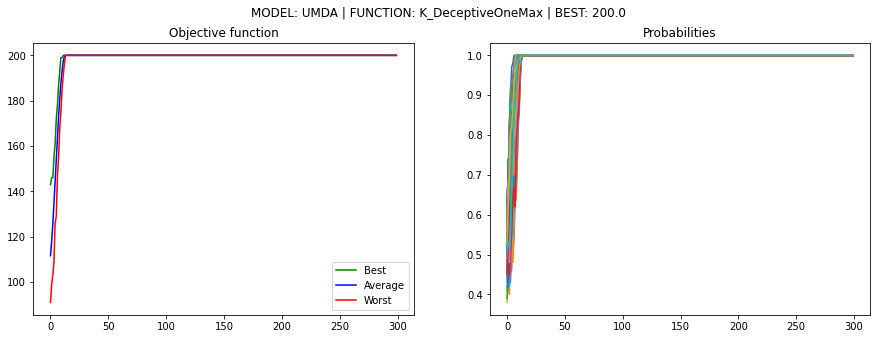

PBIL: 100%|██████████| 300/300 [00:00<00:00, 353.53it/s]


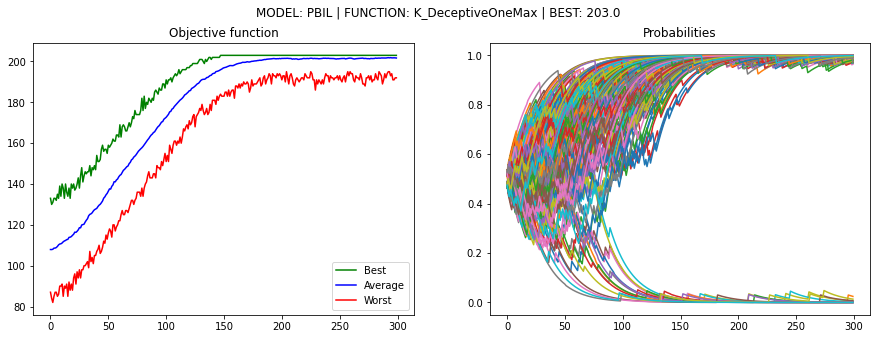

CGA: 100%|██████████| 300/300 [00:01<00:00, 283.10it/s]


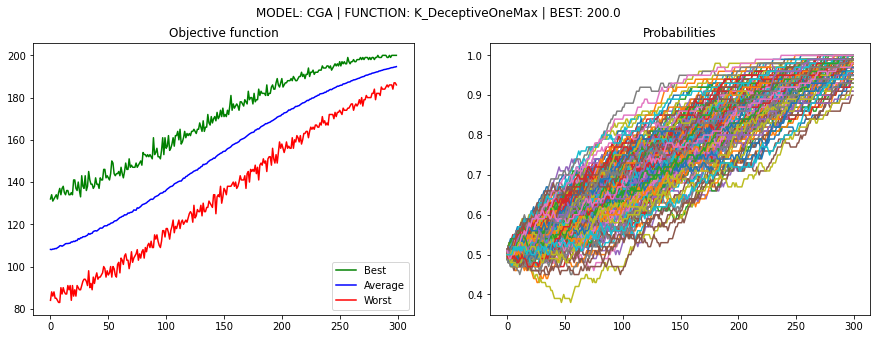

In [13]:
ds = [50, 100, 200]
cost_functions = [OneMax, DeceptiveOneMax, K_DeceptiveOneMax]
N = 1000
iters = 300

for d in ds:
    print()
    print('=========================================================================')
    print(f'd = {d}')
    print()
    for cost_f in cost_functions:
        print()
        print(f'Objective function: {cost_f.__name__}')
        print()

        M = N // 10
        UMDA_model = UMDA(cost_f=cost_f, d=d, N=N, M=M, iters=iters)
        PBIL_model = PBIL(cost_f=cost_f, d=d, N=N, T1=0.05,
                          T2=0.02, T3=0.03, iters=iters)
        CGA_model = CGA(cost_f=cost_f, d=d, N=N, Theta=0.01, iters=iters)

        UMDA_model.run()
        UMDA_model.plot_res(
            f'MODEL: {UMDA.__name__} | FUNCTION: {cost_f.__name__}')

        PBIL_model.run()
        PBIL_model.plot_res(
            f'MODEL: {PBIL.__name__} | FUNCTION: {cost_f.__name__}')

        CGA_model.run()
        CGA_model.plot_res(
            f'MODEL: {CGA.__name__} | FUNCTION: {cost_f.__name__}')
